In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#tICA-1 all trajectories load
p1 = np.loadtxt("Tica_Trajectories/Traj0_Tica0")
tica1_all_traj = p1.T
i = 1
while(i<=24):
    temp1 = np.loadtxt("Tica_Trajectories/Traj%d_Tica0"%i)
    temp1 = temp1.T
    tica1_all_traj = np.concatenate((tica1_all_traj,temp1))
    i = i+1

In [3]:
#Phi dihedral angle 
#s to track the dihedral angle
s=2
while(s<=10):
    globals()[str("q%d"%s)] = np.loadtxt("Dihedral/phi_%d_Fr1"%s)
    s = s+1

In [4]:
s=2
while(s<=10):
    globals()[str("phi%d_all_traj"%s)] = globals()[str("q%d"%s)][:,1].T
    s = s+1 

In [5]:
s=2
while(s<=10):
    k1 = 2
    while(k1<=6):
        globals()[str("tmp%d"%s)] = np.loadtxt("Dihedral/phi_%d_Fr%d"%(s,k1))
        globals()[str("tmp%d"%s)] = globals()[str("tmp%d"%s)][:,1].T
        globals()[str("phi%d_all_traj"%s)] = np.concatenate((globals()[str("phi%d_all_traj"%s)],globals()[str("tmp%d"%s)]))
        k1 = k1+1
    s = s +1

In [6]:
s=2
while(s<=10):
    k2 = 8
    while(k2<=25):
        globals()[str("g%d"%s)] = np.loadtxt("Dihedral/phi_%d_Fr%d"%(s,k2))
        globals()[str("g%d"%s)] = globals()[str("g%d"%s)][:,1].T
        globals()[str("phi%d_all_traj"%s)] = np.concatenate((globals()[str("phi%d_all_traj"%s)],globals()[str("g%d"%s)]))
        k2 = k2+1
    s = s +1

In [7]:
s=2
while(s<=10):
    globals()[str("last%d"%s)] = np.loadtxt("Dihedral/phi_%d_Fr27"%s)
    globals()[str("last%d"%s)] = globals()[str("last%d"%s)][:,1]
    globals()[str("phi%d_all_traj"%s)] = np.concatenate((globals()[str("phi%d_all_traj"%s)],globals()[str("last%d"%s)]))
    s = s+1

In [8]:
np.shape(phi4_all_traj)

(937500,)

In [9]:
np.shape(tica1_all_traj)

(937500,)

In [10]:
Correlation_Score_tica1 = np.zeros((9,1))
s=2
while(s<=10):
    Correlation_Score_tica1[s-2,0] = np.abs(np.corrcoef(tica1_all_traj,np.sin(globals()[str("phi%d_all_traj"%s)]))[0,1]) +  np.abs(np.corrcoef(tica1_all_traj,np.cos(globals()[str("phi%d_all_traj"%s)]))[0,1])
    s=s+1

In [11]:
print(Correlation_Score_tica1)

[[0.07957825]
 [0.27762882]
 [0.54981   ]
 [0.27285276]
 [0.09085925]
 [0.14262957]
 [0.09161211]
 [0.03654911]
 [0.06742381]]


In [12]:
#Psi dihedral angle 
#t to track the dihedral angle
t=1
while(t<=9):
    globals()[str("r%d"%t)] = np.loadtxt("Dihedral/psi_%d_Fr1"%t)
    t = t+1

In [13]:
t=1
while(t<=9):
    globals()[str("psi%d_all_traj"%t)] = globals()[str("r%d"%t)][:,1].T
    t = t+1 

In [14]:
t=1
while(t<=9):
    k1 = 2
    while(k1<=6):
        globals()[str("tmp%d"%t)] = np.loadtxt("Dihedral/psi_%d_Fr%d"%(t,k1))
        globals()[str("tmp%d"%t)] = globals()[str("tmp%d"%t)][:,1].T
        globals()[str("psi%d_all_traj"%t)] = np.concatenate((globals()[str("psi%d_all_traj"%t)],globals()[str("tmp%d"%t)]))
        k1 = k1+1
    t = t +1

In [15]:
t=1
while(t<=9):
    k2 = 8
    while(k2<=25):
        globals()[str("g%d"%t)] = np.loadtxt("Dihedral/psi_%d_Fr%d"%(t,k2))
        globals()[str("g%d"%t)] = globals()[str("g%d"%t)][:,1].T
        globals()[str("psi%d_all_traj"%t)] = np.concatenate((globals()[str("psi%d_all_traj"%t)],globals()[str("g%d"%t)]))
        k2 = k2+1
    t = t +1

In [16]:
t=1
while(t<=9):
    globals()[str("last%d"%t)] = np.loadtxt("Dihedral/psi_%d_Fr27"%t)
    globals()[str("last%d"%t)] = globals()[str("last%d"%t)][:,1]
    globals()[str("psi%d_all_traj"%t)] = np.concatenate((globals()[str("psi%d_all_traj"%t)],globals()[str("last%d"%t)]))
    t = t+1

In [17]:
np.shape(psi4_all_traj)

(937500,)

In [18]:
Correlation_Score_tica1_psi = np.zeros((9,1))
t=1
while(t<=9):
    Correlation_Score_tica1_psi[t-1,0] = np.abs(np.corrcoef(tica1_all_traj,np.sin(globals()[str("psi%d_all_traj"%t)]))[0,1]) +  np.abs(np.corrcoef(tica1_all_traj,np.cos(globals()[str("psi%d_all_traj"%t)]))[0,1])
    t=t+1

In [19]:
print(Correlation_Score_tica1_psi)

[[0.20813105]
 [0.24946086]
 [0.11523194]
 [1.16474046]
 [0.83715788]
 [0.65238698]
 [0.31664194]
 [0.0338851 ]
 [0.06808981]]


In [20]:
time_step = np.zeros([937500,1])
y = 0
while(y<937500):
    time_step[y,0] = y+1
    y = y+1
#print(time_step)
time_step = (2*time_step)/1000000.0

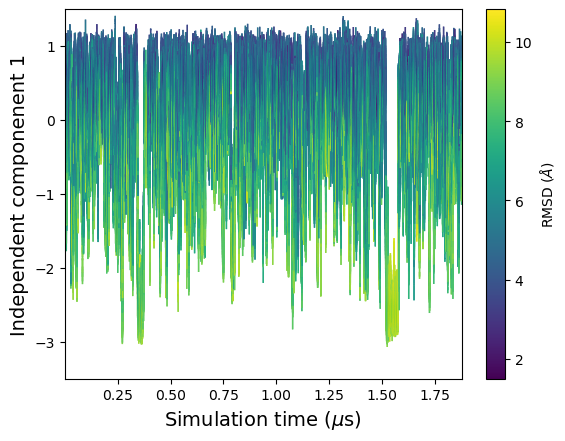

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

#x = np.linspace(0, 3 * np.pi, 500)
#y = np.sin(x)
#dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
#points = np.array([time_step, tica1_all_traj]).T.reshape(-1, 1, 2)
segments = [np.column_stack([time_step[i:i+2], tica1_all_traj[i:i+2]]) for i in range(len(time_step) - 1)]
rms = np.loadtxt("trajrmsd.dat")
c1 = rms[:,1]

fig, axs = plt.subplots(1, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
#norm = plt.Normalize(c1.min(), c1.max())
lc = LineCollection(segments, cmap='viridis', label = 'a')
# Set the values used for colormapping
lc.set_array(c1)
lc.set_linewidth(1)
line = axs.add_collection(lc)
fig.colorbar(line, ax=axs, label = "RMSD ($\AA)$")

axs.set_xlim(time_step.min(), time_step.max())
axs.set_ylim(-3.5, 1.5)
axs.clabel 
plt.xlabel('Simulation time ($\mu$s)',fontsize=14)
plt.ylabel('Independent componenent 1',fontsize=14)
plt.savefig('IC1_RMSD_Advancement.jpg', dpi = 500)

In [22]:
d2 = (phi2_all_traj*180.0)/np.pi
d3 = (phi3_all_traj*180.0)/np.pi
d4 = (phi4_all_traj*180.0)/np.pi
d5 = (phi5_all_traj*180.0)/np.pi
d6 = (phi6_all_traj*180.0)/np.pi
d7 = (phi7_all_traj*180.0)/np.pi
d8 = (phi8_all_traj*180.0)/np.pi
d9 = (phi9_all_traj*180.0)/np.pi
d10 = (phi10_all_traj*180.0)/np.pi

std_array = np.zeros((9,1))
mean_array = np.zeros((9,1))
p = 0
while(p<=8):
    std_array[p,0] = np.std(globals()[("d" + str(p+2))])
    mean_array[p,0] =np.mean(globals()["d" + str(p+2)])
    p = p+1

Text(0, 0.5, 'Average $\\phi$ Dihedral Angles (Degrees)')

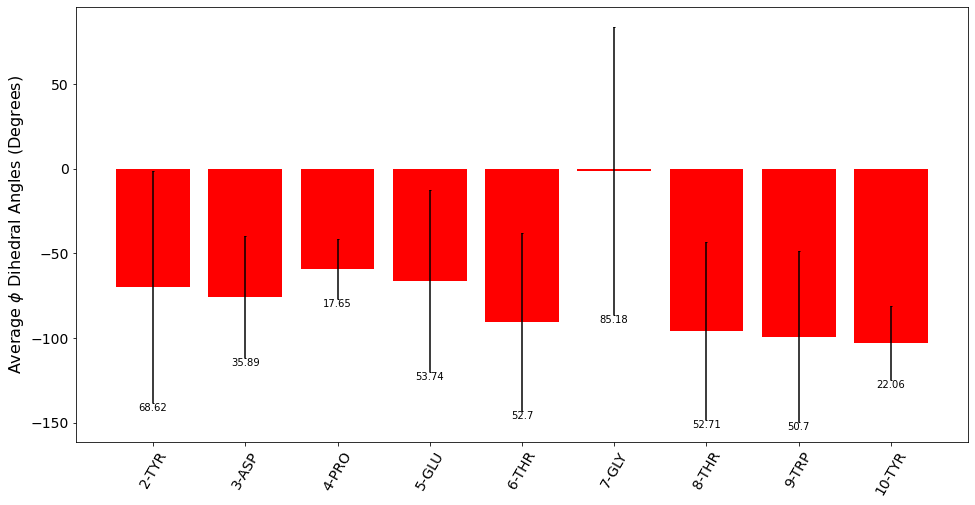

In [23]:
#Dihedrals plot

labels = np.array(["2-TYR","3-ASP","4-PRO","5-GLU","6-THR","7-GLY","8-THR","9-TRP","10-TYR"])
avgdata = mean_array[:,0]
errdata = np.around(std_array[:,0],decimals=2)

#mmgbsa_pt = [np.mean(sars11),np.mean(mers11),np.mean(sars14),np.mean(mers14)]
#mmgbsa_err = [np.std(sars11),np.std(mers11),np.std(sars14),np.std(mers14)]
#colors = ['g','b','r','orange']
plt.figure(figsize=(16,8))
bp = plt.bar(labels,avgdata,yerr = errdata,capsize =1, color="red")
plt.xticks(rotation=60)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xticks(labels)
plt.bar_label(bp,labels=errdata,label_type="edge")
#plt.title('B38 + RBD',fontsize=16)
plt.ylabel('Average $\phi$ Dihedral Angles (Degrees)',fontsize=16)
#plt.savefig('Dihedral_my.jpg',dpi = 500,bbox_inches='tight')

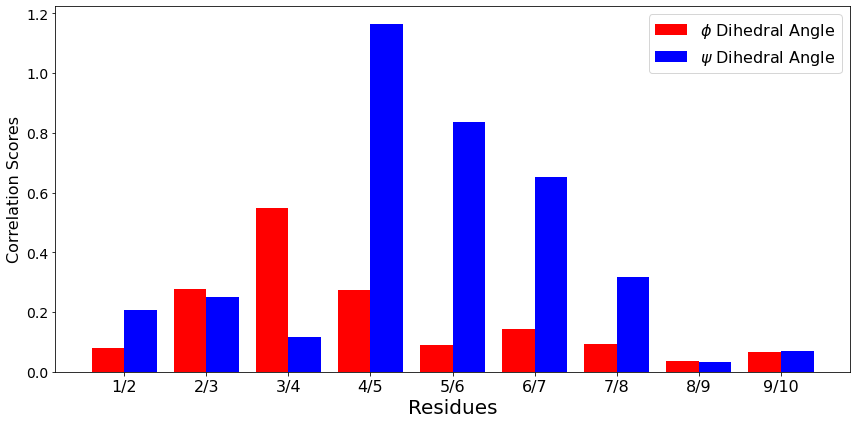

In [64]:
#PhiPsi

labels = np.array(["1/2","2/3","3/4","4/5","5/6","6/7","7/8","8/9","9/10"])
phidata = Correlation_Score_tica1[:,0]
psidata = Correlation_Score_tica1_psi[:,0]
w=0.4

fig,ax = plt.subplots(1,1,figsize = (12,6))
x1 = np.arange(len(labels))
x2 = [i+w for i in x1]
bp1 = ax.bar(x1,phidata,w,capsize =1, color="red",label='$\phi$ Dihedral Angle')
bp2 = ax.bar(x2,psidata,w,capsize =1, color="blue",label='$\psi$ Dihedral Angle')
ax.legend(fontsize=16)

plt.yticks(fontsize=14)
ax.set_xticks(x1+w/2,labels, fontsize=16)
ax.set_ylabel('Correlation Scores',fontsize=16)
ax.set_xlabel('Residues', fontsize=20)

plt.savefig('CS_me.jpg',dpi = 500,bbox_inches='tight')
fig.tight_layout()

In [26]:
print(psidata)

[0.20813105 0.24946086 0.11523194 1.16474046 0.83715788 0.65238698
 0.31664194 0.0338851  0.06808981]
